In [60]:
import itertools
import numpy
import time

import pypot.dynamixel

AMP = 30
FREQ = 0.5

In [61]:
ports = pypot.dynamixel.get_available_ports()
print('available ports:', ports)

if not ports:
    raise IOError('No port available.')


available ports: ['/dev/ttyUSB0']


In [62]:
config = {}
config['controllers'] = {}
config['controllers']['main'] = {
    'port': 'auto',
    'attached_motors': ['base', 'steering'],
    'sync_read': False
}

config['motorgroups'] = {
    'base': ['m2', 'm3'],
    'steering': ['m4', 'm5']
}

config['motors'] = {}
config['motors']['m2'] = {
    'orientation': 'indirect',
    'type': 'AX-12',
    'id': 2,
    'angle_limit': [-90.0, 90.0],
    'offset': 0.0
}
config['motors']['m3'] = {
    'orientation': 'indirect',
    'type': 'AX-12',
    'id': 3,
    'angle_limit': [-90.0, 90.0],
    'offset': 0.0
}
config['motors']['m4'] = {
    'orientation': 'indirect',
    'type': 'AX-12',
    'id': 4,
    'angle_limit': [-90.0, 90.0],
    'offset': 0.0
}
config['motors']['m5'] = {
    'orientation': 'indirect',
    'type': 'AX-12',
    'id': 5,
    'angle_limit': [-90.0, 90.0],
    'offset': 0.0
}

In [63]:
config

{'controllers': {'main': {'port': 'auto',
   'attached_motors': ['base', 'steering'],
   'sync_read': False}},
 'motorgroups': {'base': ['m2', 'm3'], 'steering': ['m4', 'm5']},
 'motors': {'m2': {'orientation': 'indirect',
   'type': 'AX-12',
   'id': 2,
   'angle_limit': [-90.0, 90.0],
   'offset': 0.0},
  'm3': {'orientation': 'indirect',
   'type': 'AX-12',
   'id': 3,
   'angle_limit': [-90.0, 90.0],
   'offset': 0.0},
  'm4': {'orientation': 'indirect',
   'type': 'AX-12',
   'id': 4,
   'angle_limit': [-90.0, 90.0],
   'offset': 0.0},
  'm5': {'orientation': 'indirect',
   'type': 'AX-12',
   'id': 5,
   'angle_limit': [-90.0, 90.0],
   'offset': 0.0}}}

In [64]:
import pypot.robot
robot = pypot.robot.from_config(config)

In [65]:
for m in robot.base:
    print(m.present_position)

-25.95
0.44


In [69]:
for m in robot.base:
    m.compliant = False
    m.goal_position = 0

In [73]:
# sin wave

import time
import numpy 

amp = 30
freq = 0.5

for m in robot.motors: # Note that we always provide an alias for all motors.
    m.compliant = False
    m.goal_position = 0

# Wait for the robot to actually reach the base position.
time.sleep(2)

# Do the sinusoidal motions for 10 seconds
t0 = time.time()

while True:
    t = time.time() - t0

    if t > 10:
        break

    pos = amp * numpy.sin(2 * numpy.pi * freq * t)
    
    for m in robot.base:
        m.goto_behavior = 'minjerk'
        m.compliant = False
        m.goal_position = pos
    
    for m in robot.steering:
        m.goto_behavior = 'minjerk'
        m.compliant = False
        m.goal_position = pos

    # We want to run this loop at 50Hz.
    time.sleep(0.02)


In [75]:
robot.motors[0].goto_position(0,2)

In [38]:
robot.motors[0].goto_behavior

'dummy'

In [78]:
for m in robot.motors:
    m.goto_behavior = 'minjerk'
    m.goto_position(-90, 2)

In [79]:
current, goal = [], []
import math
t0 = time.time()

amp = 30 # in degrees
freq = 0.5 # in Hz

while True:
    t = time.time()
    
    # run for 5s
    if t - t0 > 10:
        break

    robot.motors[0].goal_position = amp * math.sin(2 * 3.14 * freq * t)

    
    current.append(robot.motors[0].present_position)
    goal.append(robot.motors[0].goal_position)
    
    time.sleep(0.04)

Populating the interactive namespace from numpy and matplotlib


/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


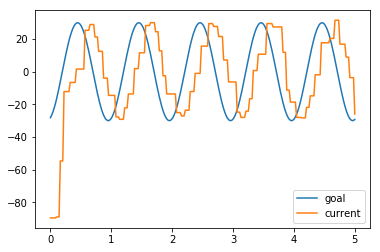

In [81]:
import pylab
%pylab inline

t = linspace(0, 5, len(current))
plot(t, goal)
plot(t, current)

legend(('goal', 'current'))

In [106]:
import math

current, goal = {}, {}

mtrs = [str(i) for i in range(4)]
for m in mtrs:
    current[m] = []
    goal[m] = []



for m in robot.motors: # Note that we always provide an alias for all motors.
    m.compliant = False
    m.goal_position = 0
time.sleep(2)

amp = 30 # in degrees
freq = 0.5 # in Hz

t0 = time.time()
while True:
    t = time.time()
    
    # run for 5s
    if t - t0 > 10:
        break
    
    for m in mtrs:
        robot.motors[int(m)].goal_position = amp * math.sin(2 * 3.14 * freq * t)

    for m in mtrs:
        current[m].append(robot.motors[int(m)].present_position)
        goal[m].append(robot.motors[int(m)].goal_position)
    
    time.sleep(0.04)

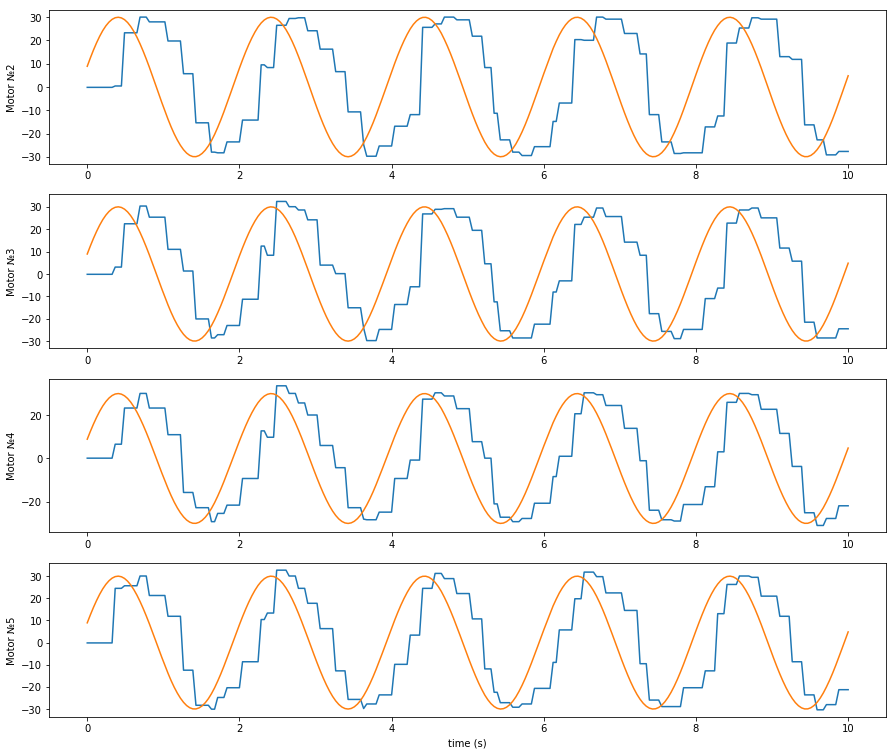

In [108]:
# plot of moving
import matplotlib.pyplot as plt


t = linspace(0, 10, len(current['0']))

plt.figure(figsize=(15, 13))
plt.subplot(4, 1, 1)
plt.plot(t, current['0'])
plt.plot(t, goal['0'])
plt.ylabel('Motor №2')

plt.subplot(4, 1, 2)
plt.plot(t, current['1'])
plt.plot(t, goal['1'])
plt.ylabel('Motor №3')

plt.subplot(4, 1, 3)
plt.plot(t, current['2'])
plt.plot(t, goal['2'])
plt.ylabel('Motor №4')

plt.subplot(4, 1, 4)
plt.plot(t, current['3'])
plt.plot(t, goal['3'])
plt.ylabel('Motor №5')
plt.xlabel('time (s)')
plt.show()

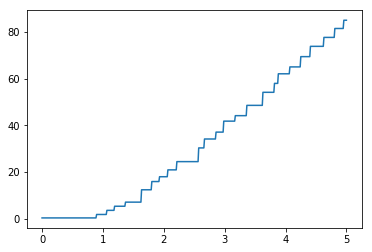

In [112]:
# Check how it goes

for m in robot.motors: # Note that we always provide an alias for all motors.
    m.compliant = False
    m.goal_position = 0
time.sleep(5)

robot.motors[0].goto_behavior = 'minjerk'

robot.motors[0].goto_position(120, 5)

pos = []
t0 = time.time()

while time.time() - t0 < 5:
    pos.append(robot.motors[0].present_position)
    
    time.sleep(0.01)
    
t = linspace(0, 5, len(pos))
plot(t, pos)

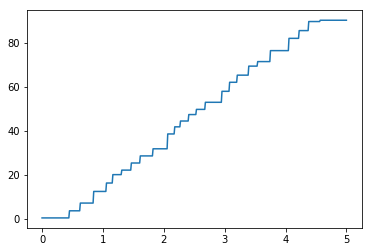

In [110]:
# Check how it goes

for m in robot.motors: # Note that we always provide an alias for all motors.
    m.compliant = False
    m.goal_position = 0
time.sleep(2)

robot.motors[0].goto_behavior = 'dummy'

robot.motors[0].goto_position(120, 5)

pos = []
t0 = time.time()

while time.time() - t0 < 5:
    pos.append(robot.motors[0].present_position)
    
    time.sleep(0.01)
    
t = linspace(0, 5, len(pos))
plot(t, pos)

In [113]:
# Primitives

from pypot.primitive.utils import Sinus

sin_1 = Sinus(robot, 25., [robot.motors[0], robot.motors[1]], amp=15, freq=.15)


In [114]:
sin_1.start()

In [115]:
sin_2 = Sinus(robot, 25., [robot.motors[2], ], amp=8, freq=.5)
sin_2.start()

In [116]:
sin_3 = Sinus(robot, 25., [robot.motors[3], ], amp=16, freq=.5)
sin_3.start()

In [117]:
from pypot.primitive import LoopPrimitive

class MotorPositionLogger(LoopPrimitive):
    def __init__(self, robot, refresh_freq, motor):
        LoopPrimitive.__init__(self, robot, refresh_freq)
        
        self.motor = getattr(self.robot, motor.name)

    # This code will be called each time the primitive is started
    def setup(self):
        self.positions = []
       
    # This method will be called at the predefined frequency
    def update(self):
        self.positions.append(self.motor.present_position)

In [118]:
logger = MotorPositionLogger(robot, 50, robot.motors[3])

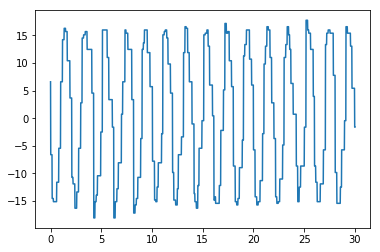

In [119]:
logger.start()

time.sleep(10)
sin_2.pause()

time.sleep(15)
sin_2.resume()

time.sleep(5)
logger.stop()

pos = logger.positions

plot(linspace(0, 30, len(pos)), pos)

In [120]:
for p in robot.active_primitives:
    p.stop()

In [121]:
sin_2.stop()

Exception in thread Thread-66:
Traceback (most recent call last):
  File "/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/site-packages/pypot/utils/stoppablethread.py", line 130, in _wrapped_target
    self._target()
  File "/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/site-packages/pypot/utils/stoppablethread.py", line 205, in run
    make_update_loop(self, self._update)
  File "/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/site-packages/pypot/utils/stoppablethread.py", line 175, in make_update_loop
    update_func()
  File "/home/xyz/Program/miniconda3/envs/robot/lib/python3.6/site-packages/pypot/dynamixel/controller.py", line 59, in update
    if self.mode == 'get' else
  File "/home/xyz/Program/minicon